In [1]:
# FS acoustic wave propagation plots using classical sum of sinusoids solution, 2017-01-17

# NOTE THIS IS NOT FINISHED !!!

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
cs = 450              # A speed of sound. For air it's 343 m/s.
nu = 3                # A frequency for the wave in Hz: cycles/s.

omega = 2*np.pi*nu    # Angular frequency in radians/s.
lambd = cs/nu         # Wavelength in m
k = (2*np.pi) / lambd   # Wavenumber in radians/mS

one_sec_time = 1
one_sec_linear_distance = one_sec_time * cs
one_sec_angular_distance = one_sec_time * omega

time_samples = 100  
distance_samples = cs

ost_range = np.linspace(0, one_sec_time, time_samples)
osld_range = np.linspace(0, one_sec_linear_distance, distance_samples)

In [3]:
# Check they all look correct

print(one_sec_linear_distance)
print(omega)
print(lambd)
print(k * one_sec_linear_distance)

450
18.84955592153876
150.0
18.84955592153876


In [4]:
def Pa(t):
    return (PaL(t) + PaR(t))

def PaR(t):
    return ((1-R) * np.cos((k * osld_range) - (omega * t)))

def PaL(t):
    return (R * np.cos((k * osld_range) + (omega * t)))


<IPython.core.display.Javascript object>


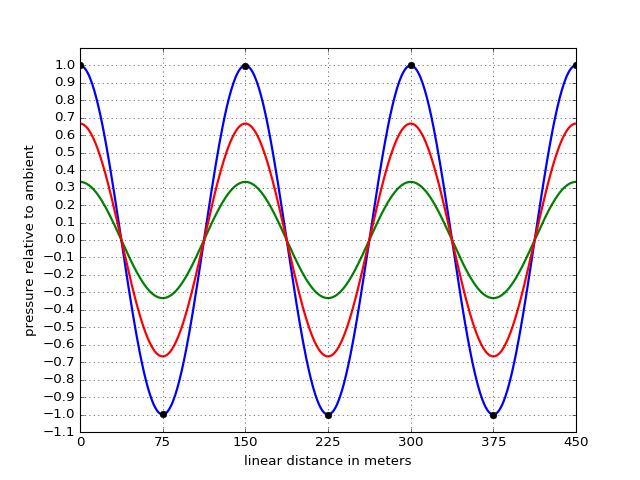

In [14]:
fig = plt.figure()
ax =  plt.axes(xlim=(0, one_sec_linear_distance), ylim=(-1.1, +1.1))

ax.set_xlabel('linear distance in meters')
ax.set_ylabel('pressure relative to ambient')

ax.set_yticks(np.arange(-1.1,1.1,0.1))
ax.set_xticks([0,75, 150, 225, 300, 375, 450])

plt.grid()

# initialization function: plot the background of each frame

line1, = ax.plot([], [], lw=2, c='b') # Comma needed to specify first element of a returned list
line2, = ax.plot([], [], lw=2, c='g') # ... instead of the list itself, even if there's only
line3, = ax.plot([], [], lw=2, c='r') # ... one element. plot() Documentation doesn't make this clear. 

dots, =  ax.plot([], [], 'ko')

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    dots.set_data([], [])
    
    return line1, line2, line3, dots

# animation function.  This is called sequentially

def animate(i):
    line1.set_data(osld_range, Pa(i))
    line2.set_data(osld_range, PaL(i))
    line3.set_data(osld_range, PaR(i))
    
    allPa = Pa(i) # For drawing the dots
    dots.set_data([0, 75, 150, 225, 300, 375, 450], 
                  [allPa[1-1], allPa[75-1], allPa[150-1], allPa[225-1], 
                   allPa[300-1], allPa[375-1], allPa[450-1]])

    return line1, line2, line3, dots


In [15]:
R = 0.333

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, ost_range, init_func=init, blit=True, repeat=False)

plt.show()
